##Set up your Kaggle API credentials

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


##Kaggle CLI (Command Line Interface) to download a dataset named "dogs-vs-cats" from Kaggle

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 24.5MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.2MB/s]


##Unzip files

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
#importing important libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

###Generators are used to process large amount of data

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
#Normalize
def process(image, label):
    image = tf.cast(image/255. ,tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
#create CNN model
model = Sequential()
#add 1st CNN layer
model.add(Conv2D(32, kernel_size = (3, 3),padding = 'valid', activation = 'relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
#add 2nd CNN layer
model.add(Conv2D(64, kernel_size = (3, 3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
#add 3rd CNN layer
model.add(Conv2D(128, kernel_size = (3, 3),padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'))
#add flaten layer
model.add(Flatten())
#add Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.1))
#add output layer (1 neuron)
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.2821 - accuracy: 0.5765 - val_loss: 0.6324 - val_accuracy: 0.6576
Epoch 2/10
625/625 [==============================] - 66s 104ms/step - loss: 0.5735 - accuracy: 0.6945 - val_loss: 0.6056 - val_accuracy: 0.6486
Epoch 3/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4954 - accuracy: 0.7611 - val_loss: 0.4812 - val_accuracy: 0.7652
Epoch 4/10
625/625 [==============================] - 66s 105ms/step - loss: 0.4297 - accuracy: 0.8008 - val_loss: 0.4597 - val_accuracy: 0.7862
Epoch 5/10
625/625 [==============================] - 68s 108ms/step - loss: 0.3822 - accuracy: 0.8290 - val_loss: 0.4360 - val_accuracy: 0.7982
Epoch 6/10
625/625 [==============================] - 66s 105ms/step - loss: 0.2961 - accuracy: 0.8741 - val_loss: 0.5163 - val_accuracy: 0.7838
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2137 - accuracy: 0.9133 - val_loss: 0.5792 - val_ac

<function matplotlib.pyplot.show(close=None, block=None)>

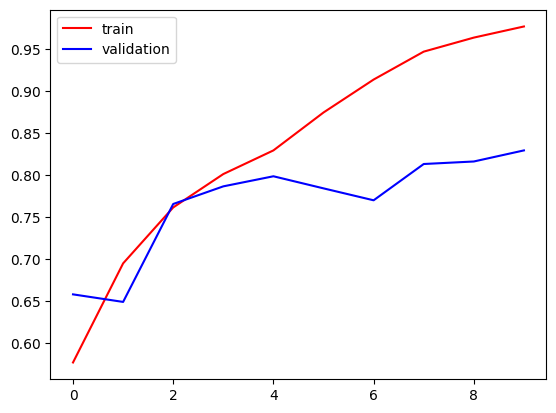

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color = 'red',label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'validation')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

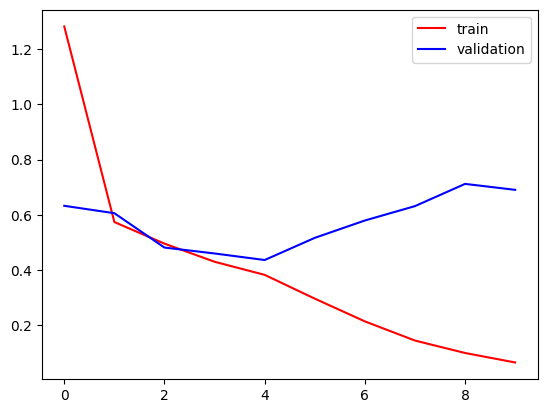

In [ ]:
plt.plot(history.history['loss'], color = 'red',label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'validation')
plt.legend()
plt.show